In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
xed = pd.read_csv(r'C:\Users\OM\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv')

In [3]:
xed.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
xed = xed.applymap(lambda s:s.lower() if type(s) == str else s)

In [5]:
xed.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,no,select,select,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,no,select,select,02.medium,02.medium,15.0,15.0,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,no,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,no,select,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,no,select,mumbai,02.medium,01.high,15.0,18.0,no,no,modified


In [6]:
xed = xed.replace('select',np.nan)

In [7]:
xed.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [8]:
xed1= xed.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [9]:
round(100*(xed1.isnull().sum()/len(xed1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [10]:
xed2 = xed1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Lead Quality','How did you hear about X Education','City'],axis=1)

In [11]:
round(100*(xed2.isnull().sum()/len(xed2.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [12]:
xed3 = xed2.drop(['Prospect ID','Lead Number','Tags'],axis=1)

In [13]:
xed3 = xed3.drop('What matters most to you in choosing a course', axis=1)

In [14]:
xed3['Specialization'] = xed3['Specialization'].fillna('not provided') 
xed3['Country'] = xed3['Country'].fillna('not provided')
xed3['What is your current occupation'] = xed3['What is your current occupation'].fillna('not provided')

In [15]:
round(100*(xed3.isnull().sum()/len(xed3.index)), 2)

Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Country                                   0.00
Specialization                            0.00
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [16]:
for column in xed3:
    print(xed3[column].value_counts())
    print('----------------------------------------------------------------------------------------')

landing page submission    4886
api                        3580
lead add form               718
lead import                  55
quick add form                1
Name: Lead Origin, dtype: int64
----------------------------------------------------------------------------------------
google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
social media            2
press_release           2
live chat               2
pay per click ads       1
welearn                 1
nc_edm                  1
youtubechannel          1
welearnblog_home        1
testone                 1
blog                    1
Name: Lead Source, dtype: int64
----------------------------------------------------------------------------------------
no     8506
yes     734
Name: Do Not Email, dtype: int64
---------------------

In [17]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

xed3['Country'] = s=xed3.apply(lambda x:slots(x['Country']), axis = 1)
xed3['Country'].value_counts()

india            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [18]:
xed3['Country'].mode()

0    india
dtype: object

In [19]:
xed3.loc[xed3['Country'] == 'not provided', ['Country']] = 'india'

In [20]:
xed3['TotalVisits'].replace(np.NaN, xed3['TotalVisits'].median(), inplace =True)

In [21]:
xed3['Page Views Per Visit'].replace(np.NaN, xed3['Page Views Per Visit'].median(), inplace =True)

In [22]:
round(100*(sum(xed3.isnull().sum(axis=1) > 1)/xed3.shape[0]),2)

0.02

In [23]:
xed3 = xed3[xed3.isnull().sum(axis=1) <1]
print(round(100*(xed3.shape[0])/(xed.shape[0]),2))

98.52


In [24]:
round(100*(xed3.isnull().sum()/len(xed3.index)), 2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [25]:
round(100 * xed3['Last Notable Activity'].value_counts()/len(xed3), 2)

modified                        36.21
email opened                    31.01
sms sent                        23.64
page visited on website          3.49
olark chat conversation          2.01
email link clicked               1.90
email bounced                    0.66
unsubscribed                     0.49
unreachable                      0.35
had a phone conversation         0.15
email marked spam                0.02
view in browser link clicked     0.01
form submitted on website        0.01
email received                   0.01
resubscribed to emails           0.01
approached upfront               0.01
Name: Last Notable Activity, dtype: float64

In [26]:
s = pd.value_counts(xed3['Last Notable Activity'])
m = (s/s.sum() * 100).lt(1)
xed3['Last Notable Activity'] = np.where(xed3['Last Notable Activity'].isin(s[m].index),'other', xed3['Last Notable Activity'])
round(100 * xed3['Last Notable Activity'].value_counts()/len(xed3), 2)

modified                   36.21
email opened               31.01
sms sent                   23.64
page visited on website     3.49
olark chat conversation     2.01
email link clicked          1.90
other                       1.74
Name: Last Notable Activity, dtype: float64

In [27]:
round(100 * xed3['Last Activity'].value_counts()/len(xed3), 2)

email opened                    37.70
sms sent                        29.91
olark chat conversation         10.69
page visited on website          7.03
converted to lead                4.70
email bounced                    3.53
email link clicked               2.93
form submitted on website        1.27
unreachable                      1.02
unsubscribed                     0.65
had a phone conversation         0.33
approached upfront               0.10
view in browser link clicked     0.07
email marked spam                0.02
email received                   0.02
resubscribed to emails           0.01
visited booth in tradeshow       0.01
Name: Last Activity, dtype: float64

In [28]:
s = pd.value_counts(xed3['Last Activity'])
m = (s/s.sum() * 100).lt(1)
xed3['Last Activity'] = np.where(xed3['Last Activity'].isin(s[m].index),'other', xed3['Last Activity'])
round(100 * xed3['Last Activity'].value_counts()/len(xed3), 2)

email opened                 37.70
sms sent                     29.91
olark chat conversation      10.69
page visited on website       7.03
converted to lead             4.70
email bounced                 3.53
email link clicked            2.93
form submitted on website     1.27
other                         1.21
unreachable                   1.02
Name: Last Activity, dtype: float64

In [29]:
round(100 * xed3['Lead Source'].value_counts()/len(xed3), 2)

google               31.56
direct traffic       27.94
olark chat           19.28
organic search       12.68
reference             5.08
welingak website      1.42
referral sites        1.37
facebook              0.43
bing                  0.07
click2call            0.04
social media          0.02
press_release         0.02
live chat             0.02
pay per click ads     0.01
welearn               0.01
nc_edm                0.01
youtubechannel        0.01
welearnblog_home      0.01
testone               0.01
blog                  0.01
Name: Lead Source, dtype: float64

In [30]:
s = pd.value_counts(xed3['Lead Source'])
m = (s/s.sum() * 100).lt(1)
xed3['Lead Source'] = np.where(xed3['Lead Source'].isin(s[m].index),'other', xed3['Lead Source'])
round(100 * xed3['Lead Source'].value_counts()/len(xed3), 2)

google              31.56
direct traffic      27.94
olark chat          19.28
organic search      12.68
reference            5.08
welingak website     1.42
referral sites       1.37
other                0.68
Name: Lead Source, dtype: float64

In [31]:
xed3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 20 columns):
Lead Origin                               9103 non-null object
Lead Source                               9103 non-null object
Do Not Email                              9103 non-null object
Do Not Call                               9103 non-null object
Converted                                 9103 non-null int64
TotalVisits                               9103 non-null float64
Total Time Spent on Website               9103 non-null int64
Page Views Per Visit                      9103 non-null float64
Last Activity                             9103 non-null object
Country                                   9103 non-null object
Specialization                            9103 non-null object
What is your current occupation           9103 non-null object
Search                                    9103 non-null object
Newspaper Article                         9103 non-null object
X Education

In [32]:
xed_final = xed3

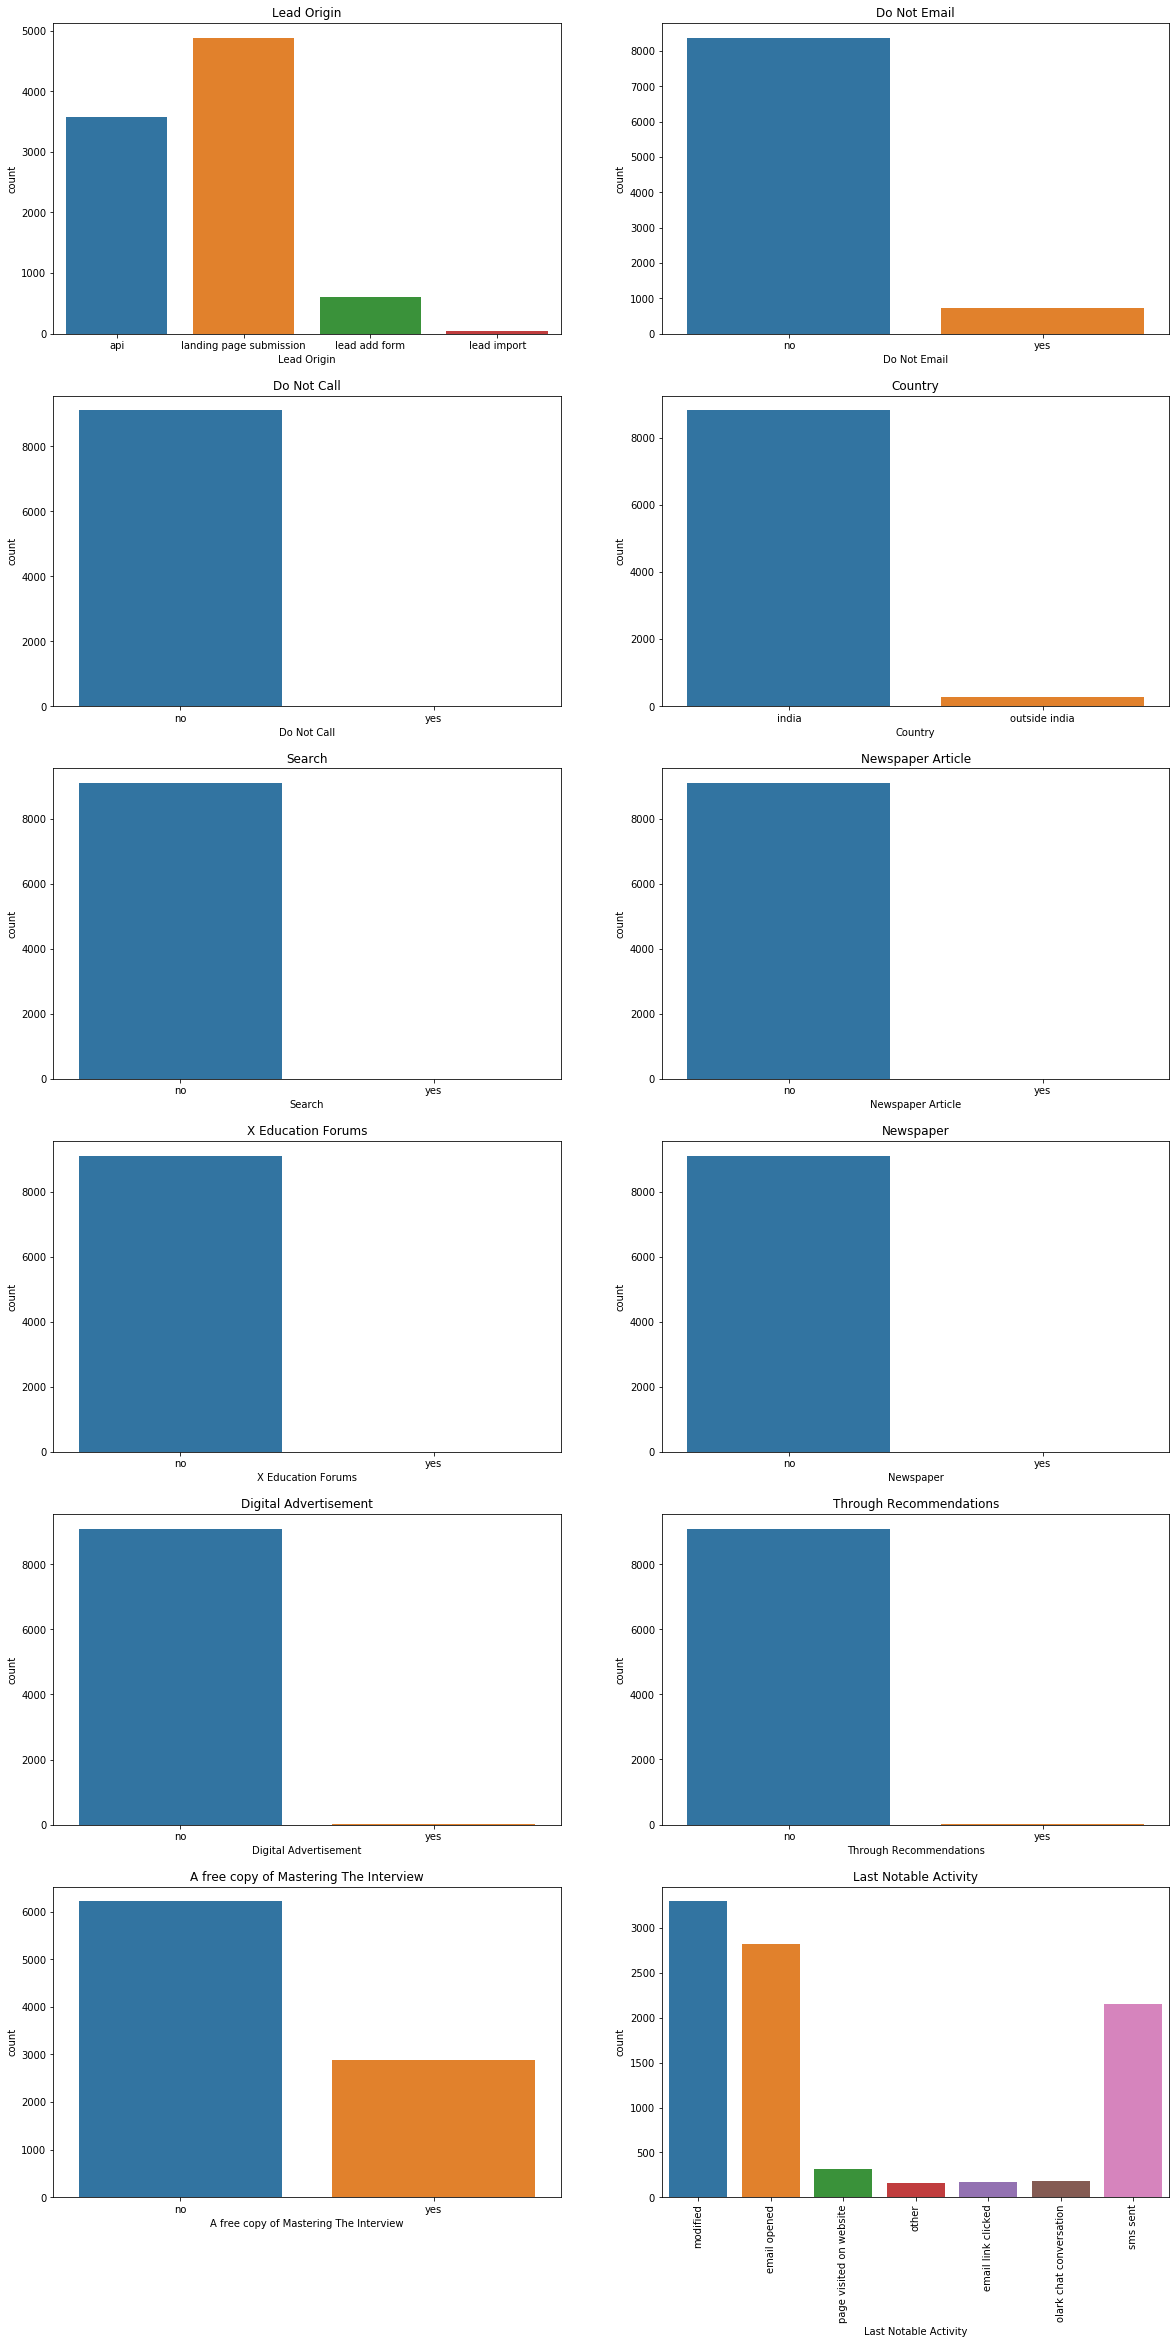

In [33]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(xed_final['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(xed_final['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(xed_final['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(xed_final['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(xed_final['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(xed_final['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(xed_final['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(xed_final['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(xed_final['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(xed_final['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(xed_final['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(xed_final['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

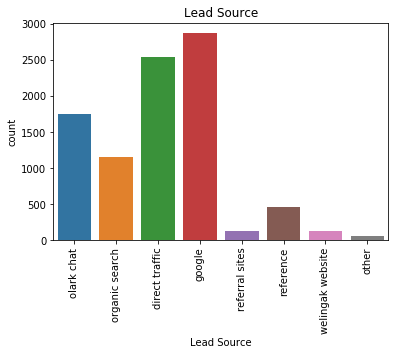

In [34]:
sns.countplot(xed_final['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

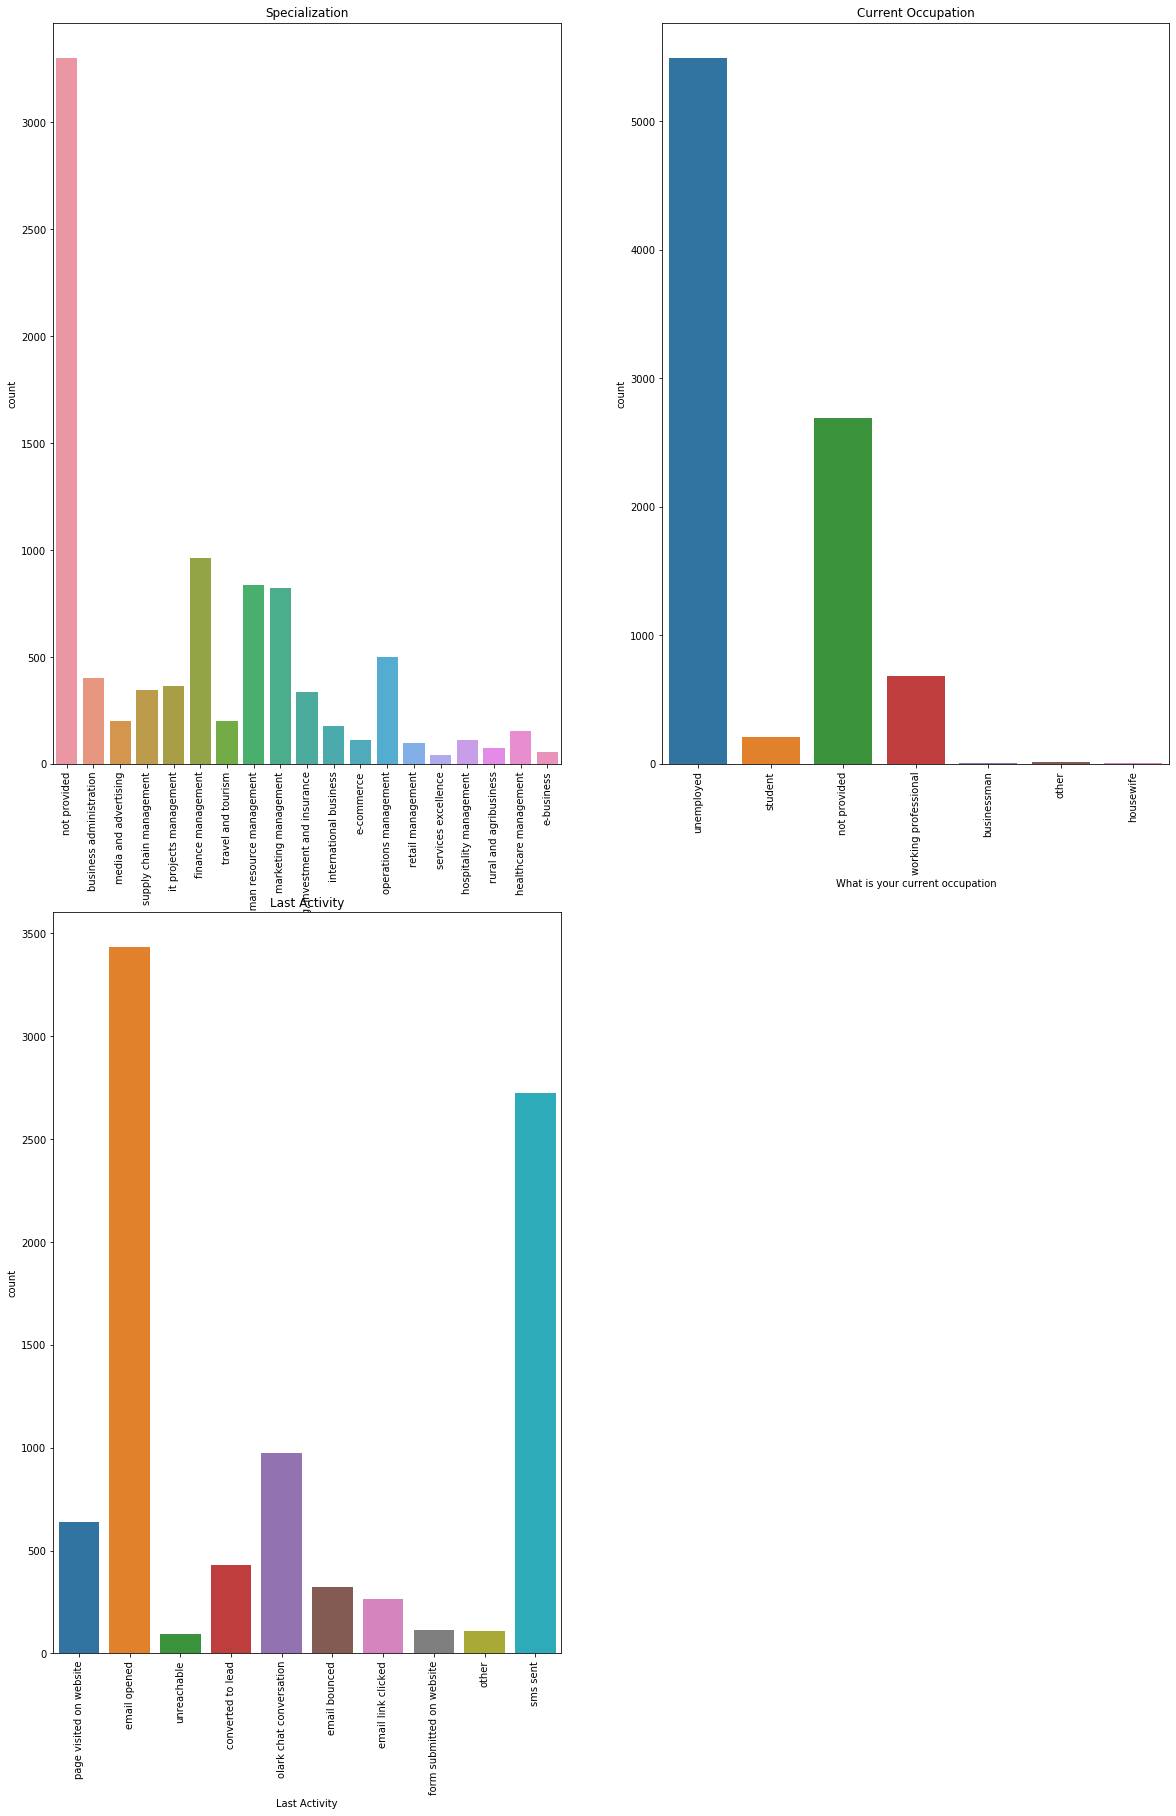

In [35]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(xed_final['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(xed_final['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)

sns.countplot(xed_final['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

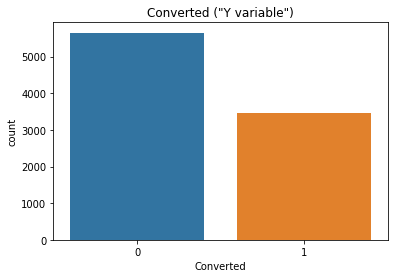

In [36]:
sns.countplot(xed_final['Converted'])
plt.title('Converted ("Y variable")')
plt.show()

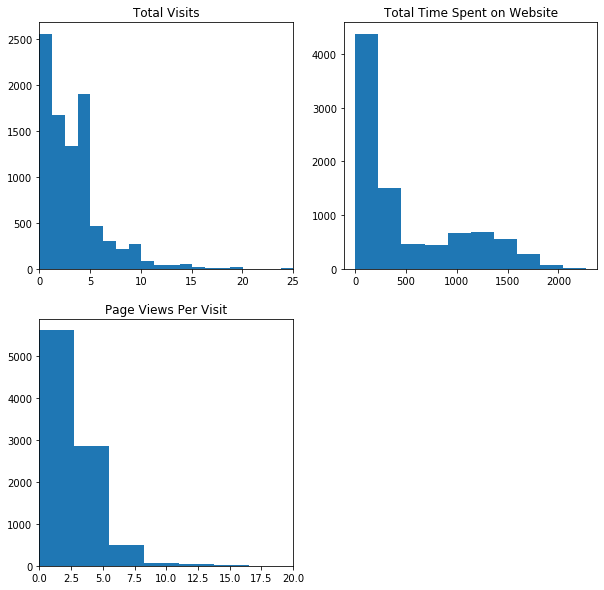

In [37]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(xed_final['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(xed_final['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(xed_final['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

In [38]:
xed3.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.379216,3.454575,483.773921,2.368972
std,0.485219,4.851123,545.519186,2.157526
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,247.000000,2.000000
75%,1.000000,5.000000,924.000000,3.000000
90%,1.000000,7.000000,1375.000000,5.000000
95%,1.000000,10.000000,1557.000000,6.000000
99%,1.000000,17.000000,1839.000000,9.000000


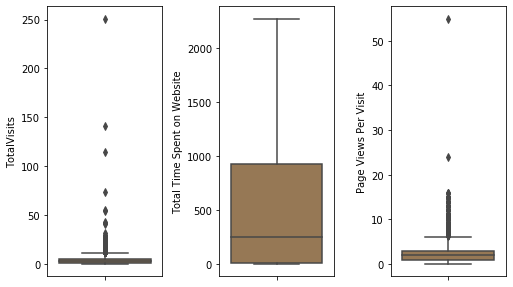

In [39]:
numeric_variables = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

def boxplot(var_list):
    plt.figure(figsize=(12,8))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        sns.boxplot(y=var,palette='cubehelix', data=xed3)
    
    plt.tight_layout()
    plt.show()
    
boxplot(numeric_variables)   

In [40]:
Q1 = xed3['TotalVisits'].quantile(0.25)
Q3 = xed3['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
xed3=xed3.loc[(xed3['TotalVisits'] >= Q1 - 1.5*IQR) & (xed3['TotalVisits'] <= Q3 + 1.4*IQR)]

Q1 = xed3['Page Views Per Visit'].quantile(0.25)
Q3 = xed3['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
xed3=xed3.loc[(xed3['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (xed3['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

xed3.shape

(8474, 20)

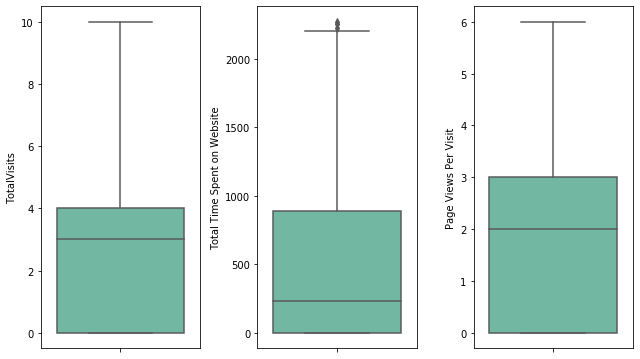

In [41]:
def boxplot(var_list):
    plt.figure(figsize=(15,10))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        sns.boxplot(y=var,palette='BuGn_r', data=xed3)
   
    plt.tight_layout()
    plt.show()
    
boxplot(numeric_variables)    

In [42]:
# varlist =  ['Search','Do Not Email', 'Do Not Call', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
#             'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# def binary_map(x):
#     return x.map({'yes': '1', "no": '0'})

# xed_final[varlist] = xed_final[varlist].apply(binary_map)
# xed_final.head()

In [43]:
for column in xed_final:
    print(xed_final[column].value_counts())
    print('----------------------------------------------------------------------------------------')

landing page submission    4885
api                        3580
lead add form               600
lead import                  38
Name: Lead Origin, dtype: int64
----------------------------------------------------------------------------------------
google              2873
direct traffic      2543
olark chat          1755
organic search      1154
reference            462
welingak website     129
referral sites       125
other                 62
Name: Lead Source, dtype: int64
----------------------------------------------------------------------------------------
no     8382
yes     721
Name: Do Not Email, dtype: int64
----------------------------------------------------------------------------------------
no     9101
yes       2
Name: Do Not Call, dtype: int64
----------------------------------------------------------------------------------------
0    5651
1    3452
Name: Converted, dtype: int64
----------------------------------------------------------------------------------------


In [44]:
xed_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 20 columns):
Lead Origin                               9103 non-null object
Lead Source                               9103 non-null object
Do Not Email                              9103 non-null object
Do Not Call                               9103 non-null object
Converted                                 9103 non-null int64
TotalVisits                               9103 non-null float64
Total Time Spent on Website               9103 non-null int64
Page Views Per Visit                      9103 non-null float64
Last Activity                             9103 non-null object
Country                                   9103 non-null object
Specialization                            9103 non-null object
What is your current occupation           9103 non-null object
Search                                    9103 non-null object
Newspaper Article                         9103 non-null object
X Education

In [45]:
xed_final.loc[:, xed_final.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [46]:
dummy = pd.get_dummies(xed_final[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity']], drop_first=True)

xed_final_dum = pd.concat([xed_final, dummy], axis=1)
xed_final_dum.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Newspaper_yes,Digital Advertisement_yes,Through Recommendations_yes,A free copy of Mastering The Interview_yes,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_other,Last Notable Activity_page visited on website,Last Notable Activity_sms sent
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,india,...,0,0,0,0,0,1,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,...,0,0,0,0,1,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,...,0,0,0,1,1,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,...,0,0,0,0,0,1,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,...,0,0,0,0,0,1,0,0,0,0


In [47]:
xed_final_dum = xed_final_dum.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity'], 1)
xed_final_dum.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,...,Newspaper_yes,Digital Advertisement_yes,Through Recommendations_yes,A free copy of Mastering The Interview_yes,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_other,Last Notable Activity_page visited on website,Last Notable Activity_sms sent
0,0,0.0,0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [48]:
# cols = xed_final_dum.columns
# num_cols = xed_final_dum._get_numeric_data().columns
# list(set(cols) - set(num_cols))

In [49]:
original_xed = xed_final_dum.copy()
print(original_xed.shape)
print(xed_final_dum.shape)

(9103, 63)
(9103, 63)


In [50]:
from sklearn.model_selection import train_test_split
X = xed_final_dum.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_other,...,Newspaper_yes,Digital Advertisement_yes,Through Recommendations_yes,A free copy of Mastering The Interview_yes,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_other,Last Notable Activity_page visited on website,Last Notable Activity_sms sent
0,0.0,0,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2.0,1428,1.0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [51]:
y = xed_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_other,...,Newspaper_yes,Digital Advertisement_yes,Through Recommendations_yes,A free copy of Mastering The Interview_yes,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_other,Last Notable Activity_page visited on website,Last Notable Activity_sms sent
7963,1.267438,2.486792,0.058515,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
5521,0.686074,-0.836090,2.098059,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1951,-0.089078,1.828055,0.285131,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1553,0.104710,1.307999,-0.168101,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9170,-0.670442,-0.890832,-1.074565,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [54]:
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_other,...,Newspaper_yes,Digital Advertisement_yes,Through Recommendations_yes,A free copy of Mastering The Interview_yes,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_other,Last Notable Activity_page visited on website,Last Notable Activity_sms sent
count,6.372000e+03,6.372000e+03,6.372000e+03,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,...,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000
mean,-3.951641e-17,3.429460e-16,2.413062e-16,0.536566,0.069052,0.004551,0.316384,0.194758,0.125235,0.007062,...,0.000157,0.000628,0.000942,0.314030,0.311676,0.359856,0.019931,0.017577,0.033271,0.238701
std,1.000078e+00,1.000078e+00,1.000078e+00,0.498700,0.253563,0.067314,0.465101,0.396046,0.331012,0.083746,...,0.012527,0.025049,0.030674,0.464165,0.463215,0.479996,0.139774,0.131418,0.179356,0.426323
min,-6.704420e-01,-8.908323e-01,-1.074565e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.766540e-01,-8.780590e-01,-6.213333e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-8.907800e-02,-4.346432e-01,-1.681013e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.984980e-01,8.121218e-01,3.984388e-01,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.797034e+01,3.220344e+00,2.385320e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
converted = (sum(xed_final_dum['Converted'])/len(xed_final_dum['Converted'].index))*100
converted

37.92156431945513

In [56]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [57]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [58]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 31),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 33),
 ('Lead Origin_landing page submission', True, 1),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 23),
 ('Lead Source_google', False, 22),
 ('Lead Source_olark chat', True, 1),
 ('Lead Source_organic search', False, 24),
 ('Lead Source_other', False, 20),
 ('Lead Source_reference', True, 1),
 ('Lead Source_referral sites', False, 47),
 ('Lead Source_welingak website', True, 1),
 ('Do Not Email_yes', True, 1),
 ('Do Not Call_yes', False, 17),
 ('Last Activity_email bounced', False, 11),
 ('Last Activity_email link clicked', False, 34),
 ('Last Activity_email opened', True, 1),
 ('Last Activity_form submitted on website', False, 42),
 ('Last Activity_olark chat conversation', False, 7),
 ('Last Activity_other', False, 3),
 ('Last Activity_page visited on website', False, 35),
 ('Last Activity_sms sent', True, 1),
 ('Last Activity_unreachable', False,

In [59]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_landing page submission',
       'Lead Origin_lead add form', 'Lead Source_olark chat',
       'Lead Source_reference', 'Lead Source_welingak website',
       'Do Not Email_yes', 'Last Activity_email opened',
       'Last Activity_sms sent', 'Specialization_not provided',
       'What is your current occupation_housewife',
       'What is your current occupation_not provided',
       'What is your current occupation_working professional',
       'Last Notable Activity_other', 'Last Notable Activity_sms sent'],
      dtype='object')

In [60]:
X_train = X_train[col]

In [61]:
import statsmodels.api as sm

In [62]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2556.0
Date:                Sat, 05 Sep 2020   Deviance:                       5112.0
Time:                        19:41:26   Pearson chi2:                 6.48e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9240      0.141     -6.574      0.000      -1.199      -0.649
Total Time Spent on Website                              1.1068      0.041     27.017      0.000       1.027       1.187
Lead Origin_landing page submission                     -1.0179      0.128     -7.943      0.000      -1.269      -0.767
Lead Origin_lead add form                                1.0204      0.915      1.116      0.265      -0.772       2.813
Lead Source_olark chat                                   1.0718      0.122      8.757      0.000       0.832       1.312
Lead Source_reference                                    2.1394      0.936      2.286      0.022       0.305       3.974
Lead Source_welingak website                             5.0552      1.363      3.709      0.000       2.384       7.726
Do Not Email_yes                                        -1.3535      0.190     -7.127      0.000      -1.726      -0.981
Last Activity_email opened                               0.9150      0.095      9.627      0.000       0.729       1.101
Last Activity_sms sent                                   1.1215      0.163      6.893      0.000       0.803       1.440
Specialization_not provided                             -0.9862      0.124     -7.966      0.000      -1.229      -0.744
What is your current occupation_housewife               21.4304   1.13e+04      0.002      0.998   -2.21e+04    2.21e+04
What is your current occupation_not provided            -1.1187      0.089    -12.566      0.000      -1.293      -0.944
What is your current occupation_working professional     2.2425      0.190     11.807      0.000       1.870       2.615
Last Notable Activity_other                              1.9083      0.286      6.681      0.000       1.348       2.468
Last Notable Activity_sms sent                           1.1754      0.158      7.437      0.000       0.866       1.485
========================================================================================================================
"""

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_lead add form,73.53
4,Lead Source_reference,57.36
5,Lead Source_welingak website,17.25
8,Last Activity_sms sent,5.81
14,Last Notable Activity_sms sent,5.05
1,Lead Origin_landing page submission,2.59
9,Specialization_not provided,2.38
7,Last Activity_email opened,2.02
3,Lead Source_olark chat,1.96
11,What is your current occupation_not provided,1.65
